# Homework 1.
## Базовые понятия для анализа временных рядов. Авторегрессионные модели.

1. (2 балла) Для чего нужно понятие стационарности в анализе временных рядов? Перечислите все случаи и распишите свой ответ.
2. (1 балл) Рассмотрите картинку data/images/ts_types.png.
a. Назовите ряды с гетероскедастичностью 
b. Какие ряды имеют сезонность? 
с. Какие ряды имеют цикличность? 
d. Какие ряды можно приблизить моделью интегрированного ряда?
e. Какие ряды можно считать стационарными? 
3. (3 балла) Рассмотрите один из графиков индекса Доу-Джонса (data/dataset/dow_jones.csv). Предположим, вы можете сделать только одно преобразование ряда, чтобы сделать его стационарным.
Какое преобразование вы выберете и почему? Сделайте это преобразование, проверьте, получили ли вы стационарный ряд. Какой ARMA моделью можно описать получившийся стационарный ряд? 
4. (2 балла) Рассмотрите ряд data/dataset/stl_example.csv. Постройте для него график автокорреляции.̆ Обьясните закономерности, которые вы видите. 
5. (4 балла) На семинаре, посвященном stl разложению мы находили период сезонности сезонных временных рядов при помощи графика автокорреляций.
    Однако, если бы мы захотели построить автоматическую систему определения периода, мы бы уже не могли “вручную” анализировать каждый график.
    Таким образом вам необходимо написать функцию get_seasonal_period(), которая бы автоматически определяла период сезонных временных рядов, использую автокорреляционную функцию.  
6. (4 балла) Используя подход box-jenkins построит̆е модель ARIMA для временного ряда dow_jones_0. Сделайте прогноз на 30 точек вперед. Интерпретируйте полученный результат.

In [8]:
import sys
from pathlib import Path

sys.path.append(str(Path().cwd()))

In [9]:
import load_dataset
from plotting import plot_ts
import pandas as pd
import numpy as np

1. (2 балла) Для чего нужно понятие стационарности в анализе временных рядов? Перечислите все случаи и распишите свой ответ.\
Ответ: Стационарность предполагает постоянство мат ожидания, дисперсии, автокорреляции(зависимость только от лага) процесса. Такие процессы часто встречаются в реальной жизни, а для их описания существует много моделей.\
Например, можно считать станционарным рядом цену на актив в краткосрочном периоде, когда кажется олгичным, что внешние условия не могут сильно измениться. 

2. (1 балл) Рассмотрите картинку data/images/ts_types.png. \
a. Назовите ряды с гетероскедастичностью \
b. Какие ряды имеют сезонность? \
с. Какие ряды имеют цикличность? \
d. Какие ряды можно приблизить моделью интегрированного ряда? \
e. Какие ряды можно считать стационарными? \
Ответ: \
a. Ряды с гетероскедастичностью: i \
b. Ряды с сезонностью: g \
с. Ряды с цикличностью: h \
d: Не понял, что к чему приблизить \
e: Стационарные ряды: b, c, d, f

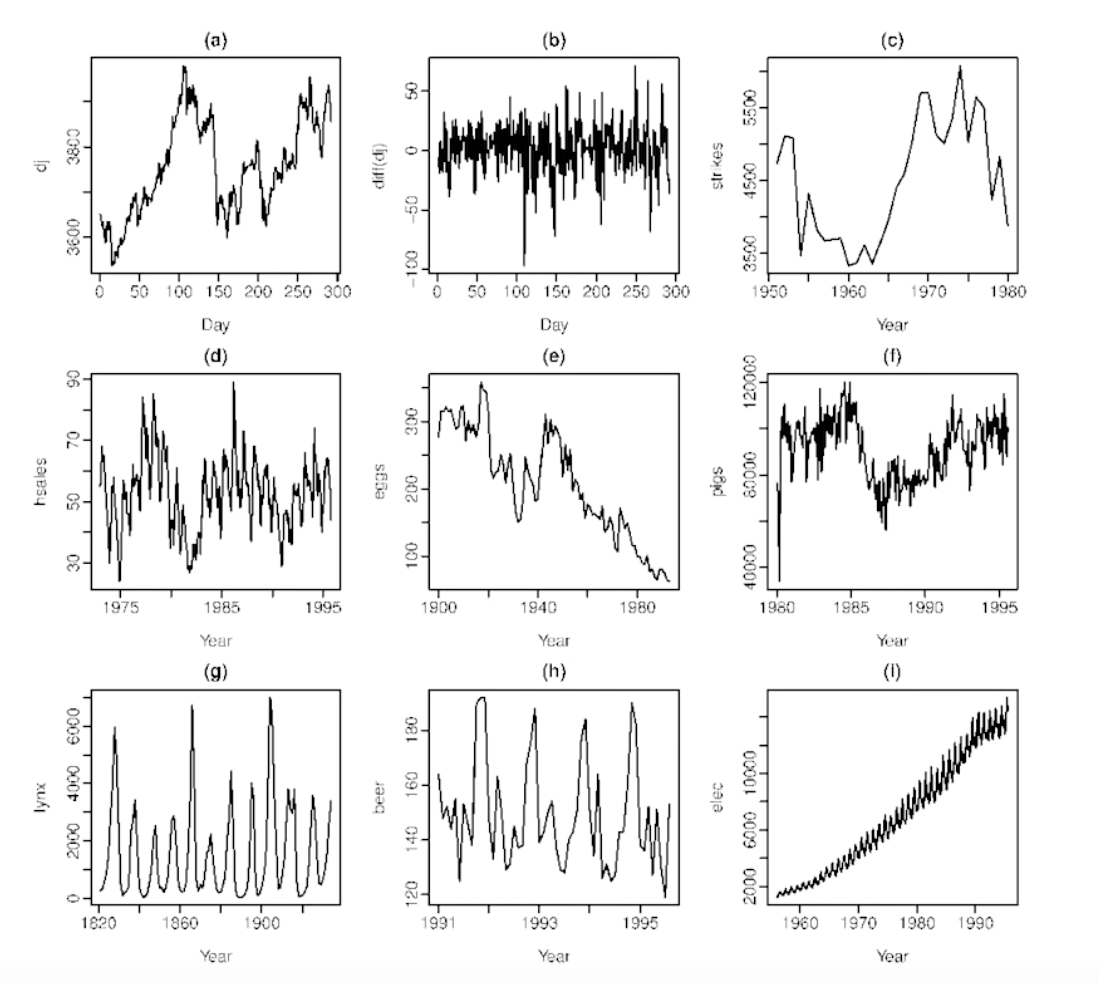

3. (3 балла) Рассмотрите один из графиков индекса Доу-Джонса (data/dataset/dow_jones.csv). Предположим, вы можете сделать только одно преобразование ряда, чтобы сделать его стационарным.
Какое преобразование вы выберете и почему? Сделайте это преобразование, проверьте, получили ли вы стационарный ряд. Какой ARMA моделью можно описать получившийся стационарный ряд? 

In [7]:
str(Path().cwd())

'/home/nikita/Документы/time_series_course/ts_march_2023'

In [11]:
dataset = load_dataset.Dataset('data/dataset/')

In [16]:
ts = dataset['dow_jones_1.csv']

/home/nikita/Документы/time_series_course/ts_march_2023/load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


In [21]:
plot_ts(ts)

Loading BokehJS ...

Видно, что не выделить сезонность, а ткаже то, что скачки между точками по модулю примерно одинаковые. Можно сделать дифференцирование с лагом 1.

In [26]:
plot_ts(ts.diff())

Loading BokehJS ...

4. (2 балла) Рассмотрите ряд data/dataset/stl_example.csv. Постройте для него график автокорреляции.̆ Обьясните закономерности, которые вы видите.

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import pacf

In [27]:
ts = dataset['stl_example.csv']

/home/nikita/Документы/time_series_course/ts_march_2023/load_dataset.py:34: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ts = pd.read_csv(


In [33]:
plot_ts(ts);

Loading BokehJS ...

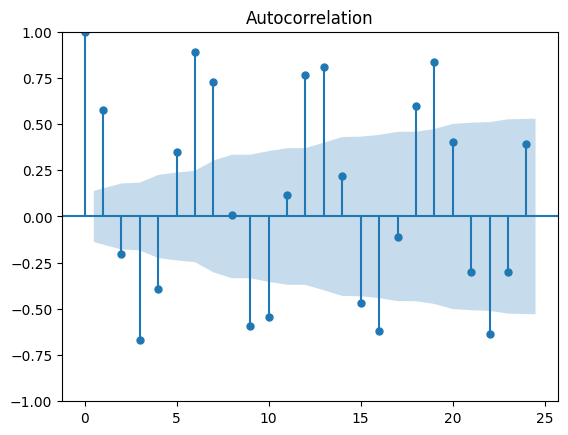

In [30]:
plot_acf(ts);

Корреляция с лагом 1: две соседние точки часто имеют один знак отклонения от среднего всего процесса. \
Корреляция с лагом 6: сезонность. \
Корреляция с лагом 7: т.к. 6й и 7й лаг скоррелированы

/home/nikita/Документы/time_series_course/ts_env/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


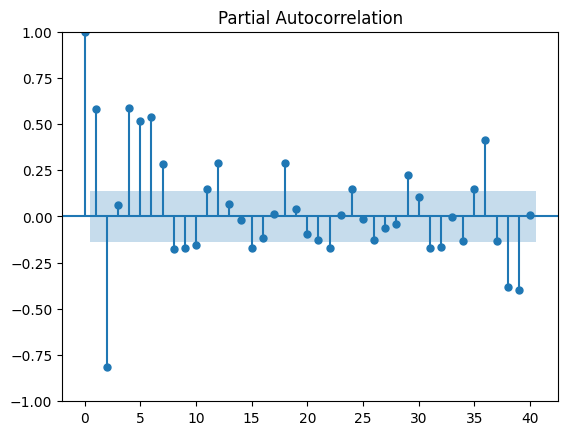

In [32]:
plot_pacf(ts, lags=40);

Сильная отрицательная корреляция с лагом 2: даже если вычесть влияние точек между двумя точками с лагом 2, то корреляция все равно остается сильной. Видимо изначально в процессе(теоретически, если выражать в формуле), $y_t = \theta * y_{t-2} + res$, где $\theta$ отрицательная, причем ближе к $-1$, чем к $0$, а $res$ - какая-то зависимость от всего остального. \
Получается, сильная отрицательная корреляция с лагом 3, которая видна на графике ACF, обусловлена "настоящей" корреляцией с лагом 2, а точка с 3 лагом просто близка по времени к точке с лагом 2. \
Сильная корреляция с лагами 5,6,7: какое-то из этих чисел - сезоность.

5. (4 балла) На семинаре, посвященном stl разложению мы находили период сезонности сезонных временных рядов при помощи графика автокорреляций.
    Однако, если бы мы захотели построить автоматическую систему определения периода, мы бы уже не могли “вручную” анализировать каждый график.
    Таким образом вам необходимо написать функцию get_seasonal_period(), которая бы автоматически определяла период сезонных временных рядов, использую автокорреляционную функцию. 